# Python机器学习库scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# 用于在jupyter中进行绘图
%matplotlib inline

## 水果识别

### 1. 数据加载

In [2]:
# 加载数据集
fruits_df = pd.read_table('fruit_data_with_colors.txt')
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
print('样本个数：', len(fruits_df))

样本个数： 59


In [6]:
# 创建目标标签和名称的字典
fruit_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
print(fruit_name_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [3]:
# 划分数据集
X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [63]:
print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(X), len(X_train), len(X_test)))

数据集样本数：59，训练集样本数：44，测试集样本数：15


### 2. 可视化查看特征变量

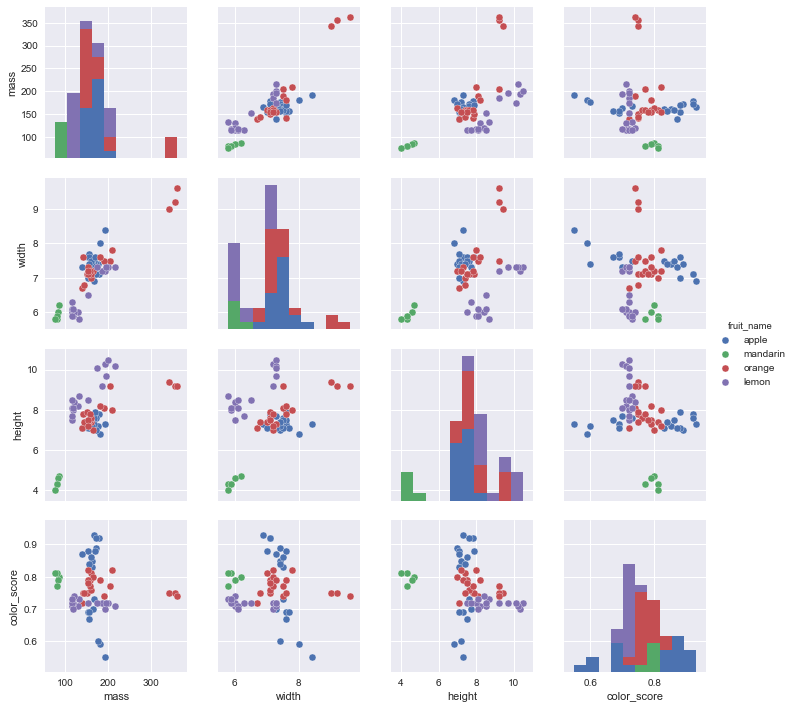

In [10]:
# 查看数据集 
sns.pairplot(data=fruits_df, hue='fruit_name', vars=['mass', 'width', 'height', 'color_score'])

<IPython.core.display.Javascript object>


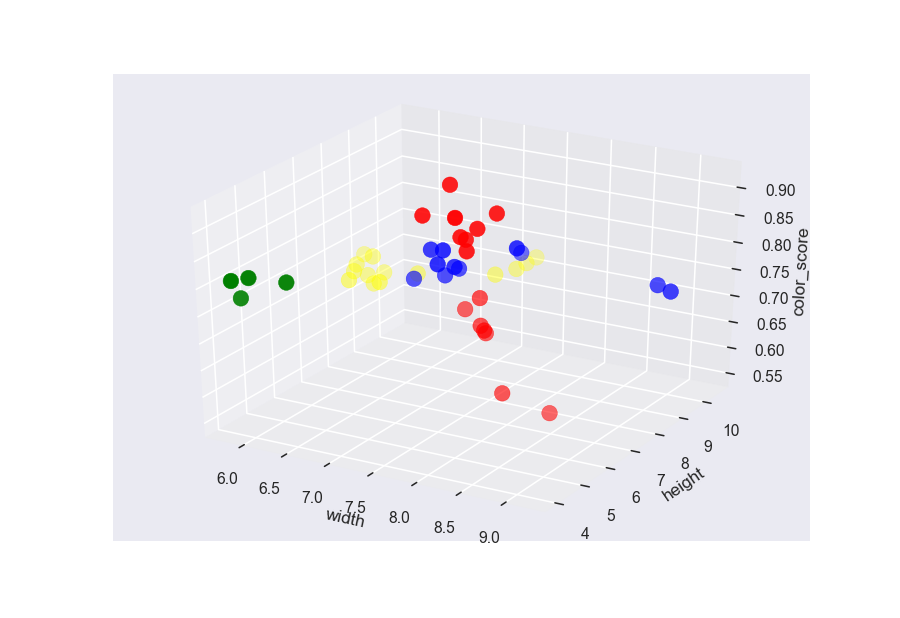

In [13]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

label_color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
colors = list(map(lambda label: label_color_dict[label], y_train))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=colors, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### 3. 建立/选择模型

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

### 4. 训练模型

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### 5. 测试模型

In [70]:
y_pred = knn.predict(X_test)
print(y_pred)

[3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]


In [72]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('准确率：', acc)

准确率： 0.533333333333


### 6. 查看k值对结果的影响

<IPython.core.display.Javascript object>


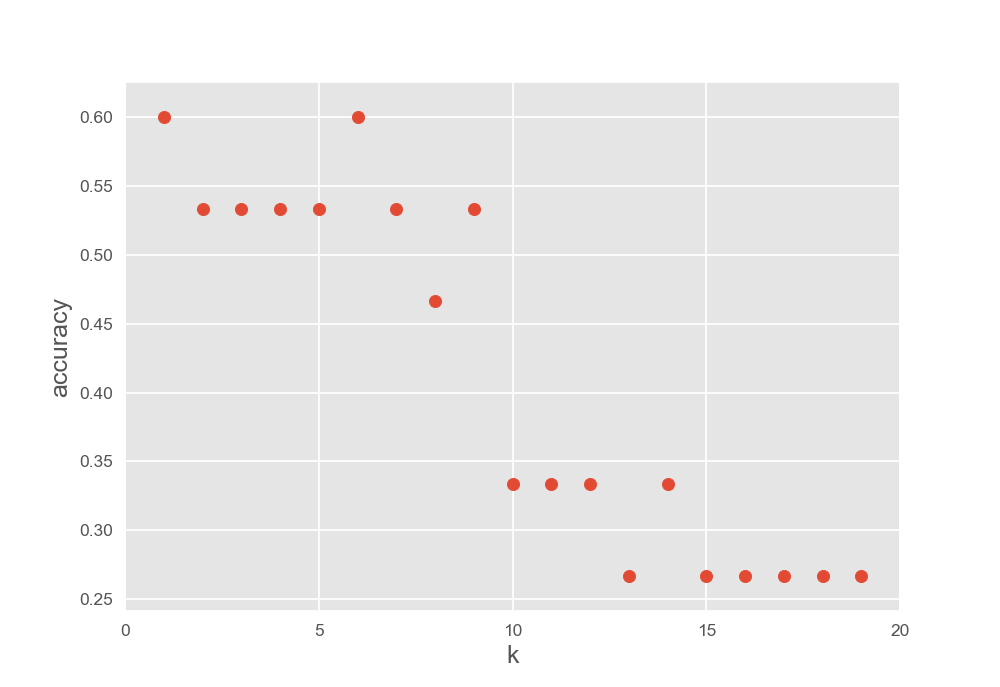

([<matplotlib.axis.XTick at 0x16dce3935f8>,
 <a list of 5 Text xticklabel objects>)

In [77]:
k_range = range(1, 20)
acc_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, acc_scores)
plt.xticks([0, 5, 10, 15, 20])

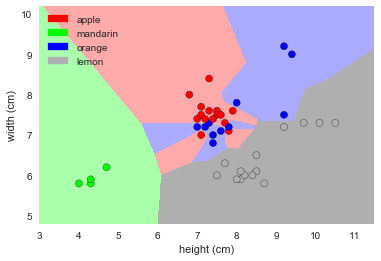

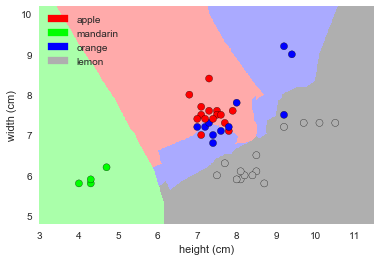

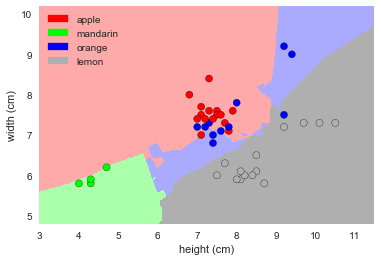

In [5]:
# 只查看width和height两列特征
from ml_visualization import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1)
plot_fruit_knn(X_train, y_train, 5)
plot_fruit_knn(X_train, y_train, 10)